In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Add working directory from google drive
FOLDERNAME = 'CS6220/HW7'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Specify the working directory
work_path = '/content/drive/My Drive/{}'.format(FOLDERNAME)

# Add to the system
import sys
sys.path.append(work_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv(os.path.join(work_path, "titanic.train.csv"))
test_data = pd.read_csv(os.path.join(work_path, "titanic.test.csv"))

In [ ]:
train_data.shape

(891, 14)

In [ ]:
train_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.50,NaN,S,11,NaN,NaN
1,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.00,NaN,S,11,NaN,"Plymouth, Devon / Detroit, MI"
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.60,C2,S,8,NaN,"Isleworth, England"
3,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,NaN,269.0,"Milwaukee, WI"
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.95,NaN,Q,15,NaN,"Co Athlone, Ireland New York, NY"


In [ ]:
test_data.shape

(418, 13)

In [ ]:
test_data.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
1,1,3,0,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,"Salo, Finland Astoria, OR"
2,2,3,0,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S,"England Albion, NY"
3,3,1,1,"Schabert, Mrs. Paul (Emma Mock)",female,35.0,1,0,13236,57.7500,C28,C,"New York, NY"
4,4,1,0,"Rosenshine, Mr. George (""Mr George Thorne"")",male,46.0,0,0,PC 17585,79.2000,NaN,C,"New York, NY"


In [ ]:
# remove the first column
test_data = test_data.iloc[:,1:]

In [ ]:
test_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,0,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN
1,3,0,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,"Salo, Finland Astoria, OR"
2,3,0,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S,"England Albion, NY"
3,1,1,"Schabert, Mrs. Paul (Emma Mock)",female,35.0,1,0,13236,57.7500,C28,C,"New York, NY"
4,1,0,"Rosenshine, Mr. George (""Mr George Thorne"")",male,46.0,0,0,PC 17585,79.2000,NaN,C,"New York, NY"


## EDA

In [ ]:
train_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [ ]:
test_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'home.dest'],
      dtype='object')

There are more columns in the training set, we need to match the column from training and test set by selecting a subset of common columns. For this reason, we will not use boat and body column.

Besides these two columns, we're also not going to use name column because it's not beneficial for the prediction.

In [ ]:
train_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,1,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S,11,NaN,NaN
1,2,1,"Quick, Miss. Winifred Vera",female,8.0,1,1,26360,26.0000,NaN,S,11,NaN,"Plymouth, Devon / Detroit, MI"
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,8,NaN,"Isleworth, England"
3,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI"
4,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.9500,NaN,Q,15,NaN,"Co Athlone, Ireland New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,"Hays, Mr. Charles Melville",male,55.0,1,1,12749,93.5000,B69,S,NaN,307.0,"Montreal, PQ"
887,3,1,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,15,NaN,NaN
888,3,0,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,NaN,NaN,NaN
889,3,0,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,32.0,NaN


### Survived

In [ ]:
train_data["survived"].value_counts()

0    536
1    355
Name: survived, dtype: int64

In [ ]:
survival_rate = train_data["survived"].value_counts() / train_data.shape[0]
survival_rate

0    0.601571
1    0.398429
Name: survived, dtype: float64

A bit unbalanced but still ok

### PClass

In [ ]:
train_data["pclass"].isna().sum()

0

In [ ]:
train_data["pclass"].value_counts()

3    490
1    212
2    189
Name: pclass, dtype: int64

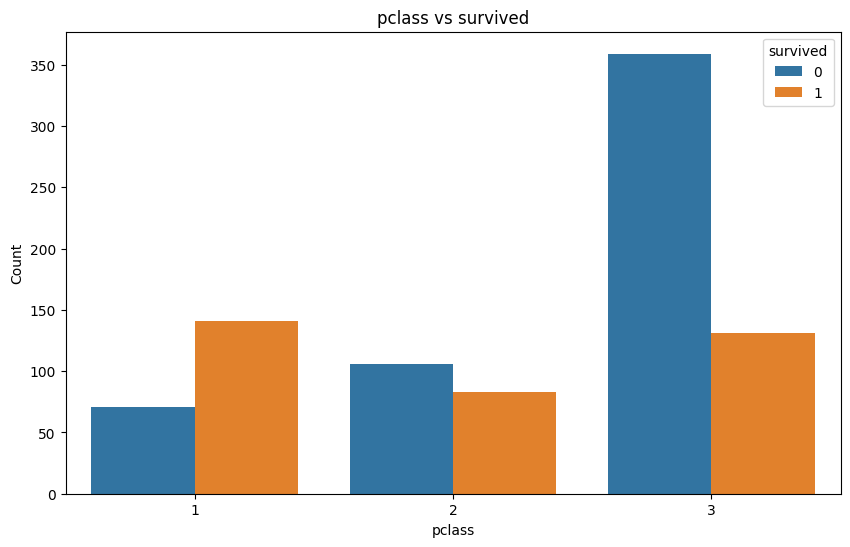

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="pclass", hue="survived", data=train_data)
plt.title(f'pclass vs survived')
plt.ylabel('Count')
plt.show()

From the plot, we can see the clearly the relationship between pclass and survived variables. Lower pclass has a higher chance of surviving. This indicates that pclass is a good predictor.

### sex

In [ ]:
train_data["sex"].isna().sum()

0

In [ ]:
train_data["sex"].value_counts()

male      575
female    316
Name: sex, dtype: int64

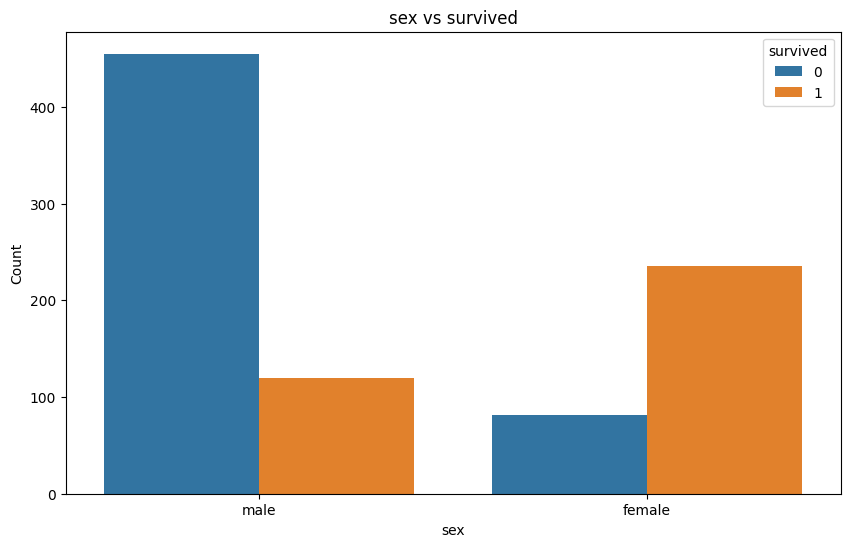

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="sex", hue="survived", data=train_data)
plt.title(f'sex vs survived')
plt.ylabel('Count')
plt.show()

There is a strong correlation between gender and survived variables. Female is generally has more chance to survive compared to male.

### age

In [ ]:
train_data["age"].isna().sum()

193

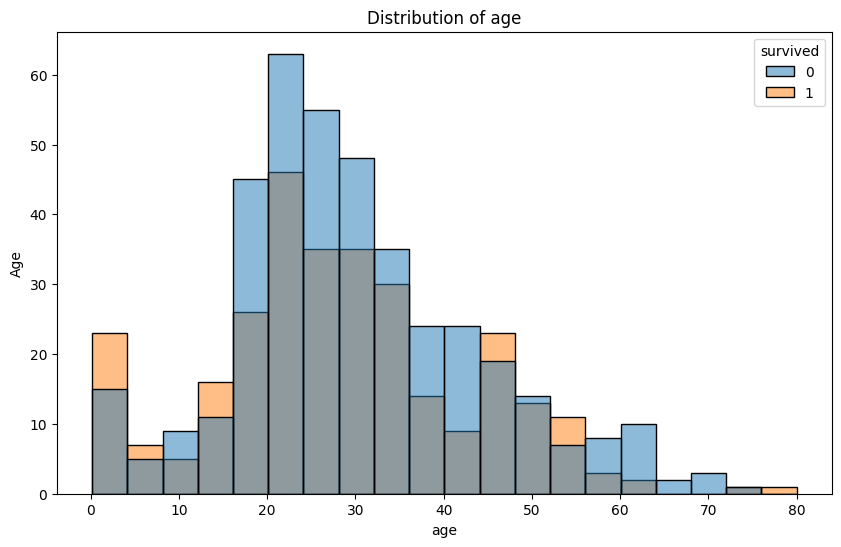

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(x="age", hue="survived", data=train_data, ax=ax, alpha=0.5)
plt.title(f'Distribution of age')
plt.ylabel('Age')
plt.show()

In [ ]:
age_threshold = 18

In [ ]:
train_data[train_data["age"] < age_threshold]["survived"].value_counts()

1    57
0    47
Name: survived, dtype: int64

In [ ]:
train_data[train_data["age"] >= age_threshold]["survived"].value_counts()

0    351
1    243
Name: survived, dtype: int64

From here, we can see that the age under 18 is more likely to survive, we can add one indicator variable indicating whether or not the passenger is above 18.

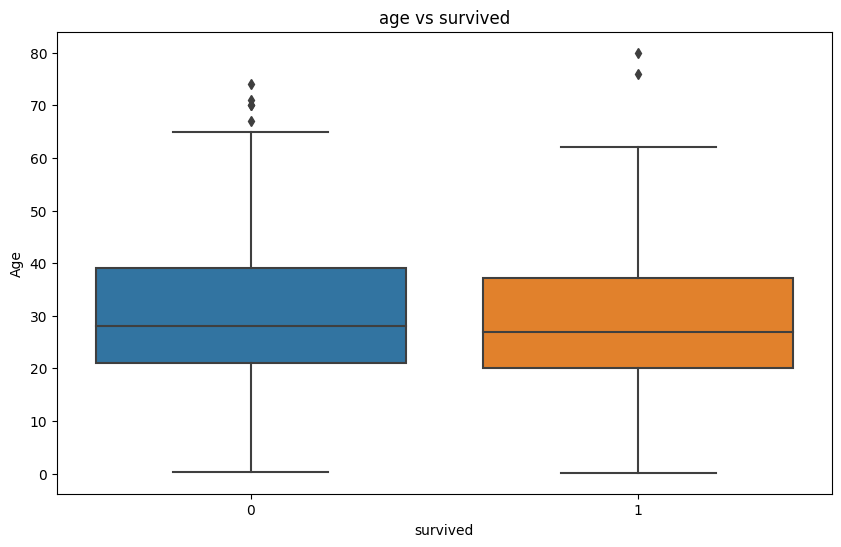

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="survived", y="age", data=train_data)
plt.title(f'age vs survived')
plt.ylabel('Age')
plt.show()

There is not much correlation between age and survived variables.

In [ ]:
missing_age = train_data[train_data["age"].isna()]
not_missing_age = train_data[~train_data["age"].isna()]

In [ ]:
survival_rate_missing_age = missing_age["survived"].value_counts() / missing_age.shape[0]
survival_rate_non_missing_age = not_missing_age["survived"].value_counts() / not_missing_age.shape[0]

In [ ]:
survival_rate_missing_age

0    0.715026
1    0.284974
Name: survived, dtype: float64

In [ ]:
survival_rate_non_missing_age

0    0.570201
1    0.429799
Name: survived, dtype: float64

Seems like the missing age value contain a bit of information to the survival. We're going to impute the missing age using the mean and add new indicator variable that the age is missing.

### Number of siblings / spouse aboard

In [ ]:
train_data["sibsp"].value_counts()

0    608
1    221
2     22
4     16
3     13
8      6
5      5
Name: sibsp, dtype: int64

In [ ]:
train_data["sibsp"].isna().sum()

0

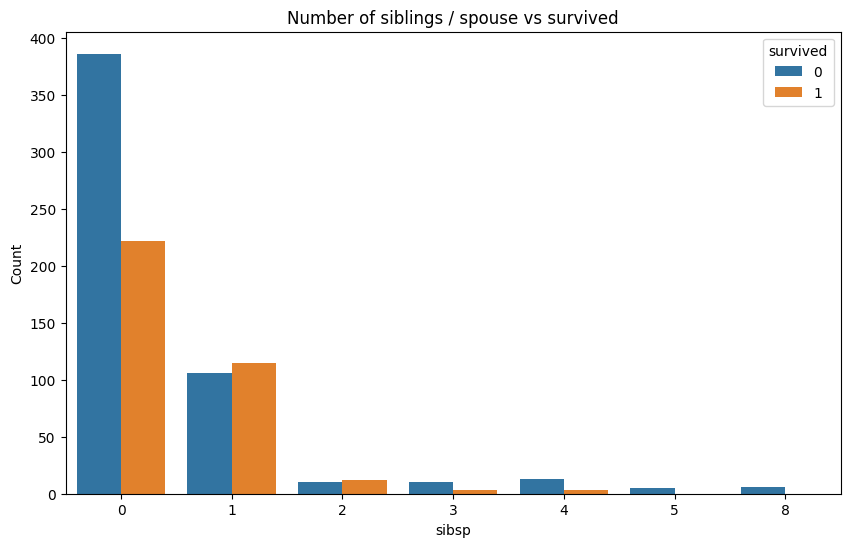

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="sibsp", hue="survived", data=train_data)
plt.title(f'Number of siblings / spouse vs survived')
plt.ylabel('Count')
plt.show()

### Number of parents / childern aboard

In [ ]:
train_data["parch"].isna().sum()

0

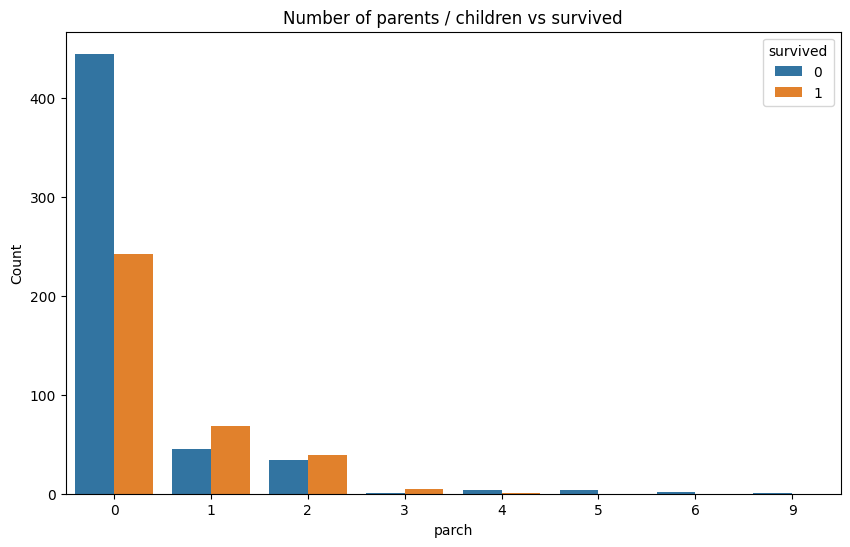

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="parch", hue="survived", data=train_data)
plt.title(f'Number of parents / children vs survived')
plt.ylabel('Count')
plt.show()

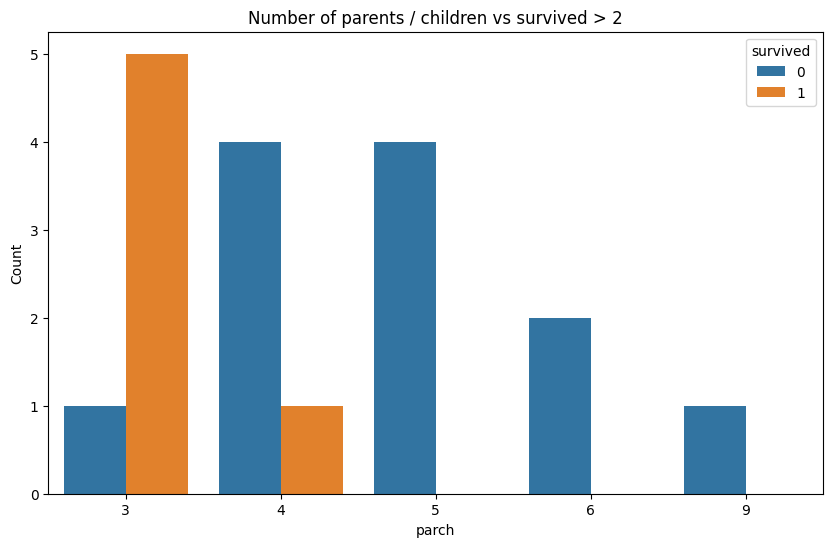

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="parch", hue="survived", data=train_data[train_data["parch"] > 2])
plt.title(f'Number of parents / children vs survived > 2')
plt.ylabel('Count')
plt.show()

### Ticket

In [ ]:
train_data["ticket"].head(10)

0                345779
1                 26360
2                113776
3             WE/P 5735
4                382650
5    SOTON/O.Q. 3101314
6           S.O./P.P. 2
7            C.A. 33111
8               3101295
9             Fa 265302
Name: ticket, dtype: object

In [ ]:
train_data[train_data["ticket"] == "113776"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6,C2,S,8,NaN,"Isleworth, England"
734,1,0,"Pears, Mr. Thomas Clinton",male,29.0,1,0,113776,66.6,C2,S,NaN,NaN,"Isleworth, England"


In [ ]:
train_data[train_data["ticket"] == "SOTON/O.Q. 3101314"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,3,0,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.25,NaN,S,NaN,NaN,NaN


At first glance column ticket doesn't seem to be meaningful.

In [ ]:
vc = train_data["ticket"].value_counts()
vc[vc > 1]

CA 2144         7
CA. 2343        7
1601            6
347082          6
PC 17608        5
               ..
F.C.C. 13529    2
226875          2
29103           2
19996           2
113796          2
Name: ticket, Length: 117, dtype: int64

In [ ]:
train_data[train_data["ticket"] == "CA 2144"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
71,3,0,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
98,3,0,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
279,3,0,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
439,3,0,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
490,3,0,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
835,3,0,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
861,3,0,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"


In [ ]:
train_data[train_data["ticket"] == "PC 17608"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
277,1,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
480,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
486,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY"
661,1,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.375,NaN,C,4,NaN,"Cooperstown, NY"
748,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.375,B61,C,4,NaN,NaN


Based on this result, we decided to not use the ticket

### Fare

In [ ]:
train_data["fare"].isna().sum()

1

In [ ]:
train_data[train_data["fare"].isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
521,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


Since the distribution of fare is heavy on the right tail, we decided to impute the fare using median

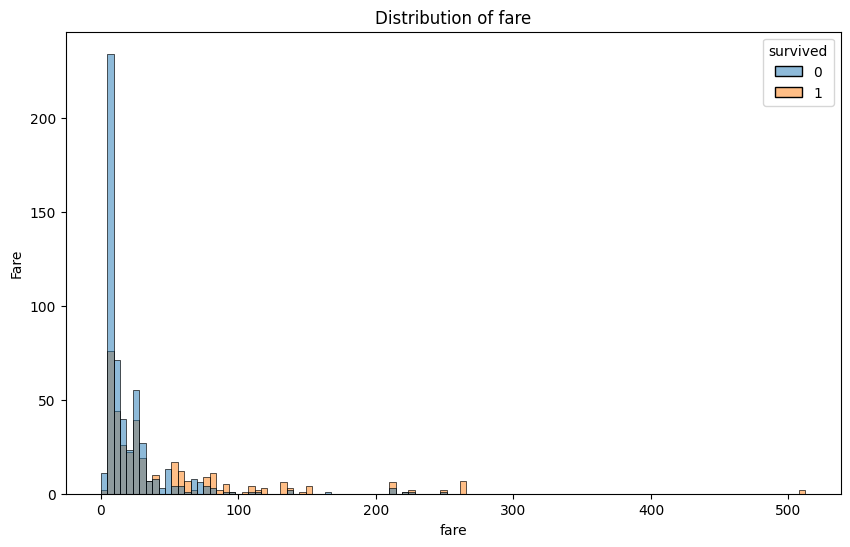

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(x="fare", hue="survived", data=train_data, ax=ax, alpha=0.5)
plt.title(f'Distribution of fare')
plt.ylabel('Fare')
plt.show()

Seems like fare has strong correlation with the survival of passenger. Let's zoom in

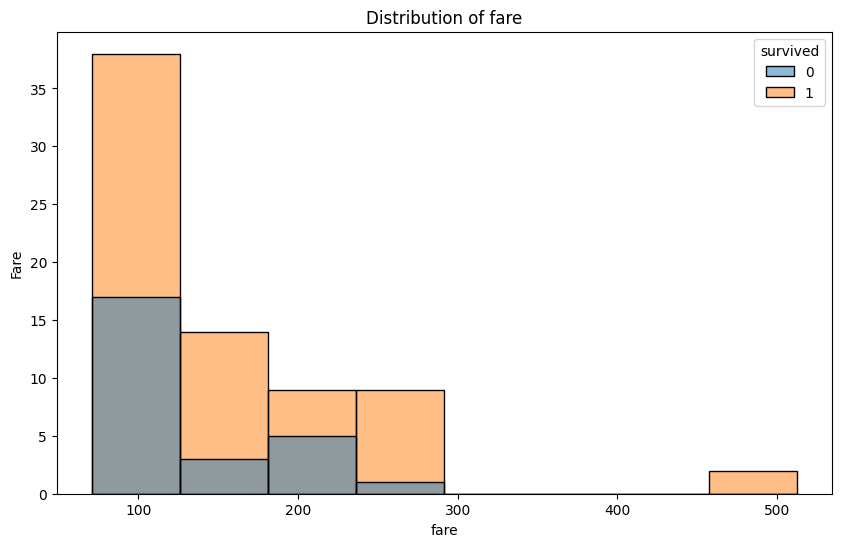

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(x="fare", hue="survived", data=train_data[train_data["fare"] > 70], ax=ax, alpha=0.5)
plt.title(f'Distribution of fare')
plt.ylabel('Fare')
plt.show()

In [ ]:
train_data["fare>70"] = train_data["fare"] > 70

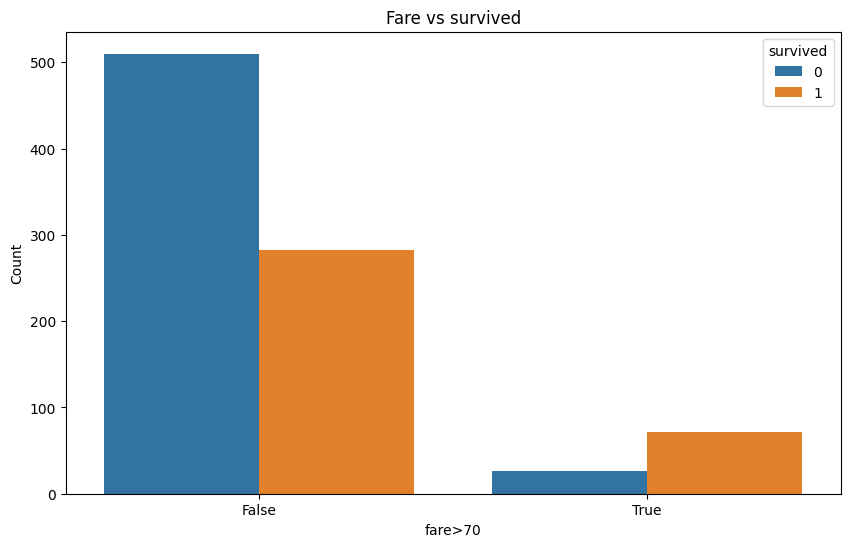

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="fare>70", hue="survived", data=train_data)
plt.title(f'Fare vs survived')
plt.ylabel('Count')
plt.show()

### Cabin

In [ ]:
train_data["cabin"].value_counts()

G6             4
F4             4
B58 B60        3
C78            3
B96 B98        3
              ..
C106           1
E31            1
C110           1
B51 B53 B55    1
E60            1
Name: cabin, Length: 142, dtype: int64

In [ ]:
train_data["cabin"].isna().sum()

702

In [ ]:
train_data[train_data["cabin"] == "G6"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,fare>70
196,3,0,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,NaN,NaN,NaN,False
620,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,13,NaN,NaN,False
719,3,1,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,13,NaN,NaN,False
882,3,0,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,NaN,NaN,NaN,False


In [ ]:
train_data[train_data["cabin"] == "F4"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,fare>70
40,2,1,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI",False
327,2,1,"Becker, Miss. Ruth Elizabeth",female,12.0,2,1,230136,39.0,F4,S,13,NaN,"Guntur, India / Benton Harbour, MI",False
660,2,1,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",female,36.0,0,3,230136,39.0,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI",False
870,2,1,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI",False


In [ ]:
train_data[train_data["cabin"] == "B96 B98"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,fare>70
214,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,4,NaN,"Bryn Mawr, PA",True
245,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S,4,NaN,"Bryn Mawr, PA",True
746,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S,4,NaN,"Bryn Mawr, PA",True


In [ ]:
train_data[train_data["cabin"] == "B58 B60"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,fare>70
121,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",True
163,1,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",True
266,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",True


In [ ]:
train_data[train_data["cabin"] == "C78"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,fare>70
66,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.00,C78,Q,14,NaN,"Green Bay, WI",True
335,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.00,C78,Q,NaN,230.0,"Fond du Lac, WI",True
369,1,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.75,C78,C,11,NaN,"New York, NY",False


Seems like the higher the cabin value counts correlates to the the chance of survival.

In [ ]:
cabin_alone = list(train_data["cabin"].value_counts()[train_data["cabin"].value_counts() == 1].index)
cabin_not_alone = list(train_data["cabin"].value_counts()[train_data["cabin"].value_counts() != 1].index)

cabin_alone_data = train_data[train_data["cabin"].isin(cabin_alone)]
cabin_not_alone_data = train_data[train_data["cabin"].isin(cabin_not_alone)]
cabin_missing_data = train_data[train_data["cabin"].isna()]

In [ ]:
cabin_alone_data["survived"].value_counts() / cabin_alone_data.shape[0]

1    0.605769
0    0.394231
Name: survived, dtype: float64

In [ ]:
cabin_not_alone_data["survived"].value_counts() / cabin_not_alone_data.shape[0]

1    0.811765
0    0.188235
Name: survived, dtype: float64

In [ ]:
cabin_missing_data["survived"].value_counts() / cabin_missing_data.shape[0]

0    0.682336
1    0.317664
Name: survived, dtype: float64

Let $\mathbb{B}:=\{0,1\}$. We decided to represent cabin column as one hot in $\mathbb{B}^{2}$:

* $[0,0]$ for missing value
* $[1,0]$ for not alone (has value counts > 1)
* $[0,1]$ for alone (value counts == 1)

### Embarked

In [ ]:
train_data["embarked"].value_counts()

S    632
C    186
Q     72
Name: embarked, dtype: int64

We will be representing embarked column as one hot

### Home.dest

In [ ]:
train_data["home.dest"].value_counts()

New York, NY                            41
London                                  11
Wiltshire, England Niagara Falls, NY     7
Montreal, PQ                             7
Paris, France                            7
                                        ..
Brookline, MA                            1
Tofta, Sweden Joliet, IL                 1
Stockholm, Sweden New York               1
Altdorf, Switzerland                     1
Vancouver, BC                            1
Name: home.dest, Length: 280, dtype: int64

We assume that the home.dest is not beneficial for our prediction, so we decided not to include it.